# Data Descprition
在这个小项目中，我们将学习用机器学习进行预测的一般步骤，我们将要预测小轿车的价格。[For more informations about the dataset.](https://archive.ics.uci.edu/ml/datasets/automobile)

In [25]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [26]:
#我们只选取连续的numeric列，这些信息可以从数据集网站的描述中获得
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [27]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Data Cleaning

In [29]:
numeric_cars = numeric_cars.replace('?', np.nan)

In [30]:
numeric_cars = numeric_cars.astype("float")
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [31]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [32]:
#price列是我们想要预测的列，所以移除price是na的行。
numeric_cars = numeric_cars.dropna(axis=0, subset=["price"])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [33]:
#对于其他有缺失值的列，我们用平均值填充
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [34]:
#normalize cols(除了price列)
price_col = numeric_cars["price"]
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars["price"] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model
先用一个属性进行knn训练，然后使用holdout validation 来evaluate model performance.

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    train_last_row = int(len(df)/2)
    
    train_df = df.iloc[0:train_last_row]
    test_df = df.iloc[train_last_row:]
    
    knn = KNeighborsRegressor()
    
    knn.fit(train_df[[train_col]], train_df[[target_col]])
    
    predictions = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[[target_col]], predictions)
    
    rmse = np.sqrt(mse)
    
    return rmse

rmse_result = {}
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_result[col] = knn_train_test(col, 'price', numeric_cars)
rmse_result_series = pd.Series(rmse_result)
rmse_result_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [36]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    train_last_row = int(len(df)/2)
    
    train_df = df.iloc[0:train_last_row]
    test_df = df.iloc[train_last_row:]
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
    
        knn.fit(train_df[[train_col]], train_df[[target_col]])
    
        predictions = knn.predict(test_df[[train_col]])
    
        mse = mean_squared_error(test_df[[target_col]], predictions)
    
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    
    return k_rmses

k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

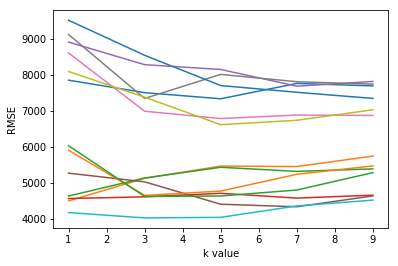

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model
use cross validation to evaluation model.

In [38]:
# 计算前面十五个属性的平均rmse
univariate_rmse_result={}
for k, v in k_rmse_results.items():
    univariate_result = list(v.values())
    univariate_rmse_result[k] = np.mean(univariate_result)
univariate_rmse_result_series = pd.Series(univariate_rmse_result)
univariate_rmse_result_series = univariate_rmse_result_series.sort_values()
univariate_rmse_result_series

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [39]:
def knn_train_test(train_cols, target_col, df):
    kf = KFold(5, shuffle=True, random_state = 1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, df[train_cols], df[[target_col]], 
                          scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    
    return avg_rmse

best_feats_rmse = {}
two_best_features = ["horsepower", "width"]
best_feats_rmse["two_best_features"] = knn_train_test(two_best_features, "price", numeric_cars)
three_best_features = ["horsepower", "width", "curb-weight"]
best_feats_rmse["three_best_features"] = knn_train_test(three_best_features, "price", numeric_cars)
four_best_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
best_feats_rmse["four_best_features"] = knn_train_test(four_best_features, "price", numeric_cars)
five_best_features = ["horsepower", "width", "curb-weight", "highway-mpg", "length"]
best_feats_rmse["five_best_features"] = knn_train_test(five_best_features, "price", numeric_cars)

print(best_feats_rmse)

{'two_best_features': 3327.0095335604806, 'three_best_features': 3027.7487021204315, 'four_best_features': 2920.6998763538077, 'five_best_features': 3378.3699698611117}


对于上一步中，‘four_best_features’，‘three_best_features’，‘two_best_features’是最好的，下面对这三中模型分别改变knn模型中的k(1-25)来寻找每一个模型的最佳k值。

In [40]:
def knn_train_test(train_cols, target_col, df):
    k_values = [x+1 for x in range(25)]
    k_rmse={}
    for k in k_values:
        kf = KFold(5, shuffle=True, random_state = 1)
        knn = KNeighborsRegressor(n_neighbors=k)
        mses = cross_val_score(knn, df[train_cols], df[[target_col]], 
                          scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        k_rmse[k] = avg_rmse
    
    return k_rmse

k_best_feats_rmse = {}
two_best_features = ["horsepower", "width"]
k_best_feats_rmse["two_best_features"] = knn_train_test(two_best_features, "price", numeric_cars)
three_best_features = ["horsepower", "width", "curb-weight"]
k_best_feats_rmse["three_best_features"] = knn_train_test(three_best_features, "price", numeric_cars)
four_best_features = ["horsepower", "width", "curb-weight", "highway-mpg"]
k_best_feats_rmse["four_best_features"] = knn_train_test(four_best_features, "price", numeric_cars)

print(k_best_feats_rmse)

{'two_best_features': {1: 4204.232910362621, 2: 3419.7587425557986, 3: 3179.341929849026, 4: 3290.0207654895216, 5: 3327.0095335604806, 6: 3415.820882324205, 7: 3501.424596914505, 8: 3616.052139018856, 9: 3721.7713100944247, 10: 3807.889714007516, 11: 3791.4311477265533, 12: 3778.946331433547, 13: 3822.5468630684504, 14: 3900.09795684177, 15: 3942.617673975338, 16: 4024.0213768095186, 17: 4096.84682051445, 18: 4160.428991095495, 19: 4202.498942068493, 20: 4243.217016761454, 21: 4259.250863428484, 22: 4306.052580520992, 23: 4359.455859022463, 24: 4387.657740032175, 25: 4408.535760644692}, 'three_best_features': {1: 2616.9341194049052, 2: 2768.8623720404635, 3: 2824.649757855767, 4: 2924.9413222361736, 5: 3027.7487021204315, 6: 3050.464158146594, 7: 3153.3850437931687, 8: 3223.5589116353012, 9: 3296.746461466885, 10: 3336.0042511609463, 11: 3383.3238906833767, 12: 3507.621116292564, 13: 3630.8020663646503, 14: 3740.630974375747, 15: 3821.8945267555378, 16: 3890.2976901224547, 17: 3943.93

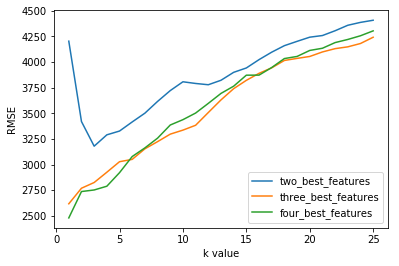

In [41]:
for k, v in k_best_feats_rmse.items():
    x = v.keys()
    y = v.values()
    plt.plot(x,y, label=k)
    plt.legend(loc='lower right')
    plt.xlabel('k value')
    plt.ylabel('RMSE')